In [147]:
import pandas as pd
import pycountry
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
from sklearn.preprocessing import MinMaxScaler

In [148]:
education_index = pd.read_csv('~/human_index.csv', sep=';')
education_index.head()

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,..,..,..,..,..,..,..,..,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,35,Andorra,..,..,..,..,..,..,..,..,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,147,Angola,..,..,..,..,..,..,..,..,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581


In [149]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

education_index['country'] = [countries.get(country, 'Unknown code') for country in education_index.Country]
education_index.head()

,HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,country
0,168,Afghanistan,..,..,..,..,..,..,..,..,...,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498,AF
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785,AL
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754,DZ
3,35,Andorra,..,..,..,..,..,..,..,..,...,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858,AD
4,147,Angola,..,..,..,..,..,..,..,..,...,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581,AO


In [150]:
cols = ['country', '2017']
education_index = education_index[cols]

education_index['2017'] = pd.to_numeric(education_index['2017'], errors='coerce')
education_index.set_index('country', inplace=True)
education_index.head()

,2017
country,
AF,0.498
AL,0.785
DZ,0.754
AD,0.858
AO,0.581


In [151]:
technology_index = pd.read_csv('~/tech_index.csv', sep=';')
# technology_index['AMOUNT'] = technology_index['AMOUNT']/len(technology_index['AMOUNT'])
technology_index.head()

,COUNTRY,AMOUNT
0,United States,6.24
1,Taiwan,6.04
2,Finland,5.92
3,Sweden,5.80
4,Japan,5.68


In [152]:
countries['Taiwan'] = 'TW'
technology_index['country'] = [countries.get(country, 'Unknown code') for country in technology_index.COUNTRY]
technology_index.head()

,COUNTRY,AMOUNT,country
0,United States,6.24,US
1,Taiwan,6.04,TW
2,Finland,5.92,FI
3,Sweden,5.80,SE
4,Japan,5.68,JP


In [153]:
cols = ['country', 'AMOUNT']
technology_index = technology_index[cols]
technology_index['AMOUNT'] = pd.to_numeric(technology_index['AMOUNT'], errors='coerce')
technology_index.head()

,country,AMOUNT
0,US,6.24
1,TW,6.04
2,FI,5.92
3,SE,5.80
4,JP,5.68


In [154]:
country_index = pd.read_csv('~/country_index.csv')
country_index = country_index.loc[:, ~country_index.columns.str.contains('^Unnamed')]
country_index.head()

,country,total
0,LK,0.000084
1,US,0.000024
2,PK,0.000021
3,TR,0.000154
4,CL,0.000124


In [155]:
n = len(country_index['total'])
x = np.sort(country_index['total'])
y = np.arange(1, n+1) / n

In [156]:
country_index.drop(index=208, inplace=True)
country_index.drop(index=25, inplace=True)

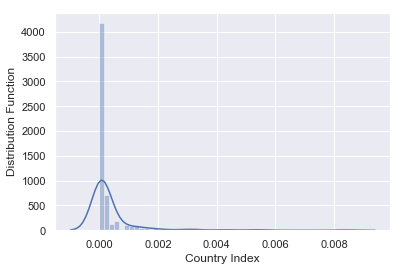

In [157]:
sns.distplot(country_index['total'])
plt.xlabel("Country Index")
plt.ylabel("Distribution Function")
plt.show()

## Country and Education index

In [158]:
country_education = pd.merge(country_index, education_index, on='country').dropna()

In [159]:
country_education['total'] = MinMaxScaler().fit_transform(country_education[['total']])

In [160]:
country_education.head()

,country,total,2017
0,LK,0.025752,0.770
1,US,0.007234,0.924
2,PK,0.006422,0.562
3,TR,0.047218,0.791
4,CL,0.038076,0.843


In [161]:
n = len(country_education['2017'])
x = np.sort(country_education['2017'])
y = np.arange(1, n+1) / n

Text(0, 0.5, 'Distribution Function')

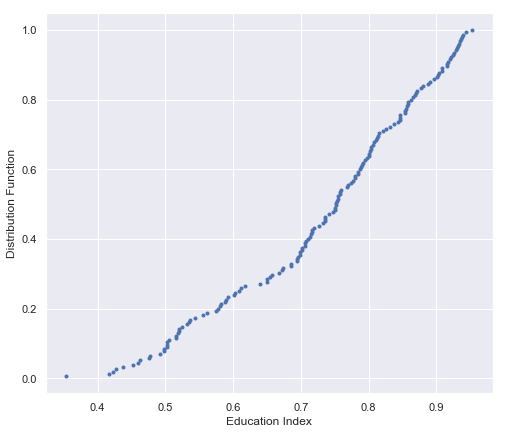

In [162]:
plt.figure(figsize=(8,7))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Education Index")
plt.ylabel("Distribution Function")

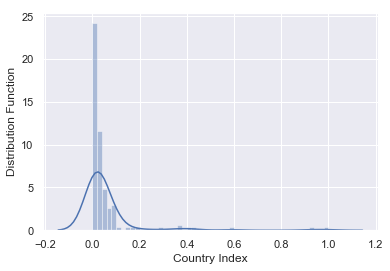

In [163]:
sns.distplot(country_education['total'])
plt.xlabel("Country Index")
plt.ylabel("Distribution Function")
plt.show()

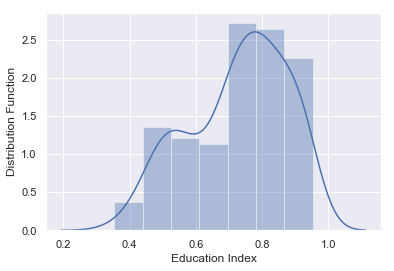

In [164]:
sns.distplot(country_education['2017'])
plt.xlabel("Education Index")
plt.ylabel("Distribution Function")
plt.show()

In [165]:
country_education_pearson = stats.pearsonr(country_education['total'], country_education['2017'])
country_education_pearson

(-0.10370821896006369, 0.19908205981937843)

In [166]:
country_education.corr()

,total,2017
total,1.000000,-0.103708
2017,-0.103708,1.000000


## Country and Technology index

In [167]:
country_technology = pd.merge(country_index, technology_index, on='country').dropna()
country_technology['total'] = MinMaxScaler().fit_transform(country_technology[['total']])

In [168]:
n = len(country_technology['AMOUNT'])
x = np.sort(country_technology['AMOUNT'])
y = np.arange(1, n+1) / n

Text(0, 0.5, 'Distribution Function')

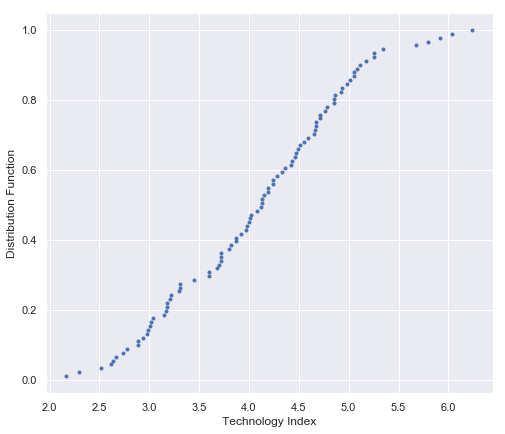

In [169]:
plt.figure(figsize=(8,7))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Technology Index")
plt.ylabel("Distribution Function")

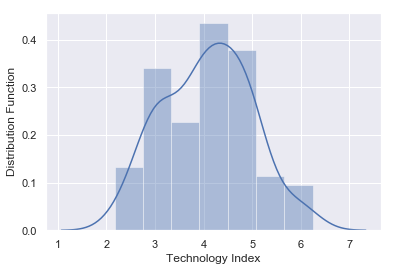

In [170]:
sns.distplot(country_technology['AMOUNT'])
plt.xlabel("Technology Index")
plt.ylabel("Distribution Function")
plt.show()

In [171]:
country_technology_pearson = stats.pearsonr(country_technology['total'], country_technology['AMOUNT'])
country_technology_pearson

(0.040632274632839804, 0.7021595330558136)

In [172]:
country_technology.corr()

,total,AMOUNT
total,1.000000,0.040632
AMOUNT,0.040632,1.000000
